In [2]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen


### 스타벅스 매장 조회

In [3]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome("./chromedriver.exe", options=options) #크롬 드라이버 경로 조심!

C:\Users\admin\AppData\Local\Temp\ipykernel_5688\1504510325.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe", options=options) #크롬 드라이버 경로 조심!


In [4]:
#스타벅스의 매장 홈페이지를 연다
star_url = "https://www.starbucks.co.kr/store/store_map.do"
wd.get(star_url)

In [5]:
# selenium 4버전으로 변경되면서 함수원형 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [6]:
#Tip!!!
#주석은 3버전/ 그 외는 4버전
#wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()

#지역검색 > 서울 > 전체 순으로 들어가도록 한다.
#오류가 발생하여 각 코드마다 2초에 텀을 준다.

wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)

wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [7]:
#주소를 soup에 담고 서울에 있는 총 매장의 수와 표본을 확인한다.
#총 585개의 매장이 수집되었다.
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [8]:
#표본을 보고 어떤식으로 데이터를 저장할지 코드를 구상한다.
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [9]:
#for 문을 이용하여 전체 데이터의 가게명, 주소, 구 정보를 저장하고 
# 저장된 정보의 길이를 확인하여 585개의 매장 모두 저장되었는지 확인한다.
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [10]:
#DataFrame에 저장후 정렬, tail을 통하여 모든 데이터가 들어갔는지 한번 더 확인.
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


### 이디야 매장 조회

In [11]:
#이디야 검색시 사용할 구 리스트를 만든다.
gu_list = list(set(df_star["구"]))
gu_list

['구로구',
 '강북구',
 '중랑구',
 '중구',
 '송파구',
 '용산구',
 '은평구',
 '노원구',
 '종로구',
 '마포구',
 '광진구',
 '관악구',
 '서대문구',
 '강서구',
 '강남구',
 '영등포구',
 '성동구',
 '성북구',
 '강동구',
 '금천구',
 '동대문구',
 '동작구',
 '서초구',
 '도봉구',
 '양천구']

In [13]:
##이디야 매장은 직접 구를 입력해 줘야 함으로 스타벅스 매장 수집때 만든 구 리스트를 활용하여 검색한다.
edi_url = "https://www.ediya.com/contents/find_store.html"
driver = webdriver.Chrome("./chromedriver.exe", options=options)
driver.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_5688\2931147818.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("./chromedriver.exe", options=options)


In [14]:
#for 문을 이용하여 각 구별 매장을 저장하고 길이를 통하여 매장 수를 확인한다.
from distutils.command.sdist import sdist

edi_info = []

for gu in gu_list:
    driver.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH,'//*[@id="keyword"]').clear
    driver.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]  

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

692

In [15]:
#이디야 정보를 DataFrame에 저장하고 tail을 통하여 모든 데이터가 들어갔는지 확인한다.
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
687,창동제일점,도봉구,서울 도봉구 노해로70길 81 (창동)
688,창동중앙점,도봉구,서울 도봉구 노해로63길 78 (창동)
689,창동하나로마트점,도봉구,"서울 도봉구 마들로11길 20 (창동, 농협창동유통센타)"
690,창동학원가점,도봉구,서울 도봉구 해등로16길 61 (창동)
691,창동현대타운점,도봉구,서울 도봉구 도봉로114길 22 (창동)


### 구별 매장 수 확인 및 차이 구하기

In [16]:
#위에서 수집한 스타벅스 데이터중 구와 매장수 정보만 가져와 새 데이터 프레임을 만든다.
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,구로구,12
1,강북구,6
2,중랑구,7
3,중구,53
4,송파구,34
5,용산구,24
6,은평구,10
7,노원구,13
8,종로구,39
9,마포구,35


In [17]:
#이디야 데이터중 구와 매장 수 정보만 가져와 새 데이터 프레임을 만든다.
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,구로구,28
1,강북구,20
2,중랑구,27
3,중구,29
4,송파구,39
5,용산구,14
6,은평구,27
7,노원구,31
8,종로구,31
9,마포구,38


In [18]:
#매장수 차이 데이터
#두 데이터를 합쳐 매장수 차이를 나타낸 데이터 프레임을 만든다
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,구로구,28,12,16
1,강북구,20,6,14
2,중랑구,27,7,20
3,중구,29,53,-24
4,송파구,39,34,5
5,용산구,14,24,-10
6,은평구,27,10,17
7,노원구,31,13,18
8,종로구,31,39,-8
9,마포구,38,35,3


### 데이터 시각화

In [19]:
#폰트 적용
from matplotlib import rc
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmtt10',
 'cmex10',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'cmr10',
 'STIXSizeTwoSym',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'cmsy10',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXGeneral',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'Imprint MT Shadow',
 'Bodoni MT',
 'Harlow Solid Italic',
 'Mongolian Baiti',
 'Pristina',
 'Myanmar Text',
 'Bodoni MT',
 'Goudy Stout',
 'Segoe UI',
 'Palatino Linotype',
 'Eras Demi ITC',
 'Arial',
 'Segoe UI Symbol',
 'Perpetua',
 'Century Gothic',
 'Tw Cen MT Condensed',
 'Segoe Script',
 'Gill Sans MT Condensed',
 'Century Schoolboo

In [20]:
#음수 적용
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

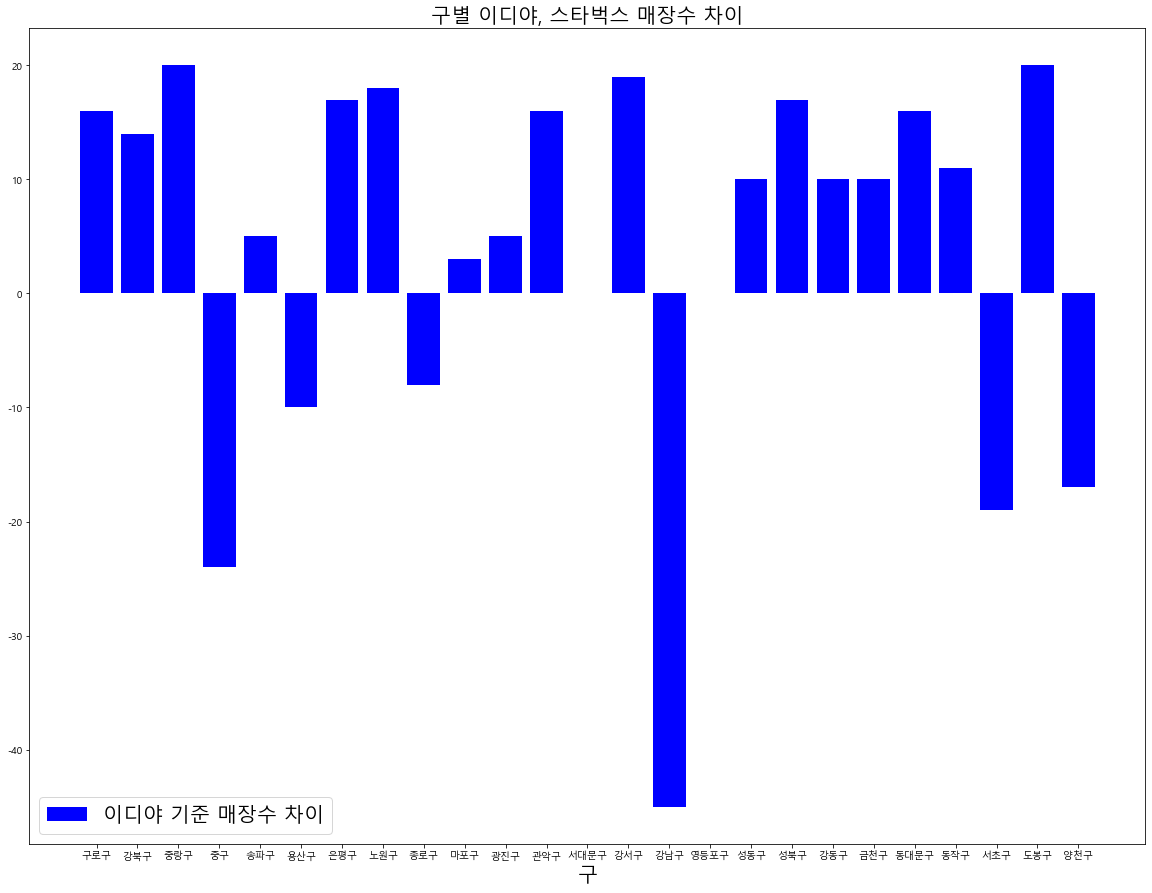

In [21]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams["font.family"] = "Malgun Gothic" #폰트 적용
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()